# Импорт библиотек
На этом этапе мы подключаем необходимые библиотеки:
- `pandas` для работы с данными.
- `matplotlib` для визуализации.
- `sklearn` для создания моделей машинного обучения и оценки их качества.


In [18]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc

# Загрузка данных
Данные загружаются файла `heart_dataset.csv` — используется для задачи классификации. Этот датасет содержит данные о пациентах, включая целевой признак наличия или отсутствия сердечного заболевания.

In [19]:
# Загрузка данных
data = pd.read_csv("heart_dataset.csv")

# Предварительная обработка данных

Разделяем признаки и целевые переменные для каждого датасета.
Целевая переменная — `target`.

In [20]:
# Предварительная обработка данных

target = 'target'
X = data.drop(columns=target).values
y = data[target].values

# Разделение выборки
**Основные моменты**:
- 80\% данных используются для обучения модели.
- 20\% данных выделяются для валидации (проверка модели до тестирования).
- `random_state` фиксирует случайные процессы (например, разделение данных) для обеспечения повторяемости экспериментов.
- Используется стратификация по целевому признаку `target`.


In [21]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модели классификации

Две модели классификации на основе ансамблевых алгоритмов:

1. **RandomForestClassifier** (бэггинг):
   - Основной принцип: построение множества решающих деревьев на различных подвыборках данных.

2. **GradientBoostingClassifier** (градиентный бустинг):
   - Основной принцип: последовательное улучшение моделей путём минимизации функции потерь.

In [22]:
# Модели классификации

# RandomForestClassifier
rf_params = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_depth': [None, 5, 10, 25],
    'min_samples_split': [2, 5, 10]
}

rf_clf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf_clf, rf_params, cv=10, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Лучшие параметры для RandomForestClassifier:", grid_rf.best_params_)

# GradientBoostingClassifier
gb_params = {
    'n_estimators': [25, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9]
}

gb_clf = GradientBoostingClassifier(random_state=42)
grid_gb = GridSearchCV(gb_clf, gb_params, cv=25, scoring='accuracy', n_jobs=-1)
grid_gb.fit(X_train, y_train)

best_gb = grid_gb.best_estimator_
print("Лучшие параметры для GradientBoostingClassifier:", grid_gb.best_params_)

Лучшие параметры для RandomForestClassifier: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 25}
Лучшие параметры для GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


# Подбор гиперпараметров

1. **Модели**:
    - **RandomForestClassifier** — алгоритм ансамблевого обучения, использующий метод бэггинга и множество решающих деревьев.
    - **GradientBoostingClassifier** — алгоритм, основанный на последовательном построении решающих деревьев с минимизацией ошибки через градиентный спуск.

2. **Гиперпараметры**:
    - **RandomForestClassifier**:
        - `n_estimators`: количество деревьев в ансамбле. Большее значение повышает точность, но увеличивает время обучения.
        - `max_depth`: максимальная глубина каждого дерева. Контролирует переобучение.
        - `min_samples_split`: минимальное количество объектов для разбиения узла. Регулирует сложность модели.
    - **GradientBoostingClassifier**:
        - `n_estimators`: количество деревьев в последовательности. Большее значение может улучшить точность, но увеличивает риск переобучения.
        - `learning_rate`: шаг обучения, определяющий вклад каждого дерева. Меньшее значение требует большего количества деревьев.
        - `max_depth`: максимальная глубина деревьев. Более глубокие деревья могут лучше захватывать сложные зависимости, но увеличивают риск переобучения.

3. **GridSearchCV**:
    - Используется для поиска оптимальных комбинаций гиперпараметров.
    - Исследует все возможные сочетания значений, указанных в сетке параметров (`param_grid`).
    - `cv=25` задаёт количество разбиений для кросс-валидации, что улучшает надёжность оценки.
    - Основная метрика для сравнения в данной работе — `accuracy`.

# Оценка моделей

 **Метрики оценки**:
   - **Accuracy (точность)**: доля правильно классифицированных объектов среди всех тестовых данных.
   - **ROC-кривая (Receiver Operating Characteristic)**: графическое представление соотношения между долей истинных положительных результатов (True Positive Rate) и ложных положительных результатов (False Positive Rate) при разных значениях порога вероятности.
   - **AUC (Area Under Curve)**: площадь под ROC-кривой. Чем ближе значение к 1, тем лучше модель различает классы.
   - Предсказания вероятностей для каждого объекта на тестовой выборке с помощью метода `predict_proba()`.
   

In [23]:
# Оценка моделей

# RandomForestClassifier
rf_predictions = best_rf.predict(X_test)
rf_probs = best_rf.predict_proba(X_test)[:, 1]
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Точность RandomForestClassifier: {rf_accuracy:.2f}")

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# GradientBoostingClassifier
gb_predictions = best_gb.predict(X_test)
gb_probs = best_gb.predict_proba(X_test)[:, 1]
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f"Точность GradientBoostingClassifier: {gb_accuracy:.2f}")

gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, gb_probs)
gb_auc = auc(gb_fpr, gb_tpr)

Точность RandomForestClassifier: 0.89
Точность GradientBoostingClassifier: 0.87


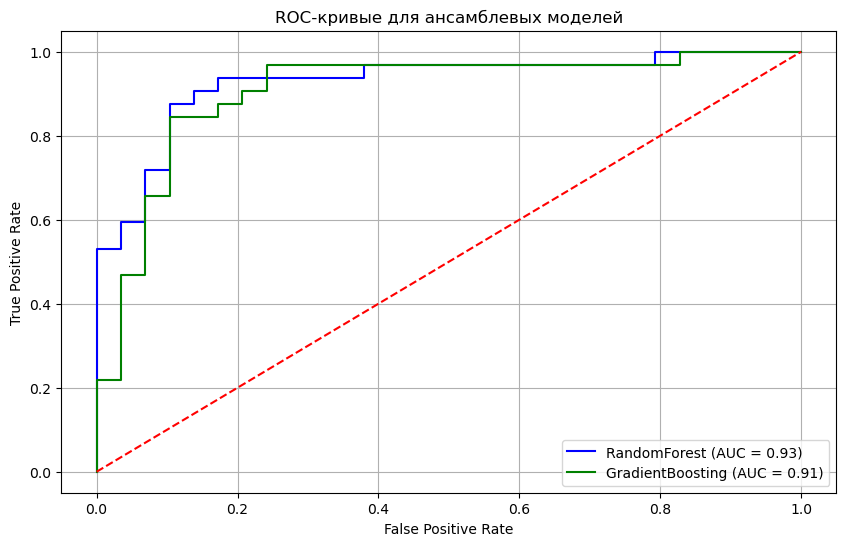

In [24]:
# Визуализация ROC-кривых
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f"RandomForest (AUC = {rf_auc:.2f})", color='b')
plt.plot(gb_fpr, gb_tpr, label=f"GradientBoosting (AUC = {gb_auc:.2f})", color='g')
plt.plot([0, 1], [0, 1], 'r--')
plt.title("ROC-кривые для ансамблевых моделей")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

# Выводы

1. **Гиперпараметры**:
   - **RandomForestClassifier**: 
     - `max_depth = 10` — ограничение глубины деревьев предотвращает переобучение.
     - `min_samples_split = 5` — снижает вероятность создания избыточно сложных деревьев.
     - `n_estimators = 25` — достаточное количество деревьев для устойчивого результата.
   - **GradientBoostingClassifier**:
     - `learning_rate = 0.1` — обеспечивает точную настройку модели.
     - `max_depth = 3` — упрощённые базовые деревья для лучшей обобщающей способности.
     - `n_estimators = 50` — большее количество итераций для повышения точности.

2. **Результаты**:
   - Точность моделей на тестовой выборке составила **0.89** для `RandomForest` и **0.87** для `GradientBoosting`.
   - `AUC`: **0.93** для случайного леса и **0.91** для градиентного бустинга, что указывает на более высокую способность леса различать классы.

3. **Обобщение**:
   - `RandomForestClassifier` лучше справляется с различением классов и показывет более стабильные результаты.